# Objetivo: estratégia com uma média movel de 200 dias em relação ao indice de aceleração financeira (IFR = 100 - 100/(1+(U/D))=100/(1+D/U); onde U = E(variações positivas da ação no período, "upmove") e D as negativas("downmove").


# Para tal, existem 3 condiçoes

# Importando pacotes

In [ ]:
!pip install yfinance

     |████████████████████████████████| 5.5MB 6.4MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22616 sha256=96b91551b8d70b2e2afb110d7148eecfc4f570cc84400cf2fe8da116764cf897
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:

import pandas as pd
pd.options.mode.chained_assignment = None
import yfinance as yf
import matplotlib.pyplot as plt

In [ ]:
df = yf.download('^BVSP', start="1996-01-01", end="2020-12-31")
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-01-02,4299.000000,4393.399902,4299.000000,4390.100098,4390.100098,0
1996-01-03,4392.600098,4685.600098,4392.600098,4681.500000,4681.500000,0
1996-01-04,4681.500000,4746.299805,4651.100098,4684.100098,4684.100098,0
1996-01-05,4684.100098,4711.100098,4582.399902,4694.299805,4694.299805,0
1996-01-08,4796.799805,4796.799805,4695.100098,4741.000000,4741.000000,0
...,...,...,...,...,...,...
2020-12-22,115825.000000,116903.000000,115648.000000,116348.000000,116348.000000,6947900
2020-12-23,116636.000000,118311.000000,116636.000000,117857.000000,117857.000000,6483300
2020-12-28,117806.000000,119213.000000,117805.000000,119051.000000,119051.000000,7171700


# 1) Verificar se a ação está sendo negociada abaixo da MA(200)

In [ ]:
df['MA200'] = df['Adj Close'].rolling(window=200).mean() # cria uma media movel de 200 dias
df

,Open,High,Low,Close,Adj Close,Volume,MA200
Date,,,,,,,
1996-01-02,4299.000000,4393.399902,4299.000000,4390.100098,4390.100098,0,NaN
1996-01-03,4392.600098,4685.600098,4392.600098,4681.500000,4681.500000,0,NaN
1996-01-04,4681.500000,4746.299805,4651.100098,4684.100098,4684.100098,0,NaN
1996-01-05,4684.100098,4711.100098,4582.399902,4694.299805,4694.299805,0,NaN
1996-01-08,4796.799805,4796.799805,4695.100098,4741.000000,4741.000000,0,NaN
...,...,...,...,...,...,...,...
2020-12-22,115825.000000,116903.000000,115648.000000,116348.000000,116348.000000,6947900,94821.445
2020-12-23,116636.000000,118311.000000,116636.000000,117857.000000,117857.000000,6483300,94920.745
2020-12-28,117806.000000,119213.000000,117805.000000,119051.000000,119051.000000,7171700,95085.665


In [ ]:
df = df.dropna() # retiro os valores nulos decorrentes da criação da MA(200)
df

,Open,High,Low,Close,Adj Close,Volume,MA200
Date,,,,,,,
1996-10-18,6766.000000,6816.100098,6742.700195,6798.100098,6798.100098,0,5670.683501
1996-10-21,6851.500000,6851.500000,6761.700195,6798.899902,6798.899902,0,5682.727500
1996-10-22,6798.899902,6798.899902,6659.899902,6675.600098,6675.600098,0,5692.698000
1996-10-23,6658.100098,6658.100098,6543.000000,6648.600098,6648.600098,0,5702.520500
1996-10-24,6645.000000,6645.000000,6562.600098,6588.799805,6588.799805,0,5711.993000
...,...,...,...,...,...,...,...
2020-12-22,115825.000000,116903.000000,115648.000000,116348.000000,116348.000000,6947900,94821.445000
2020-12-23,116636.000000,118311.000000,116636.000000,117857.000000,117857.000000,6483300,94920.745000
2020-12-28,117806.000000,119213.000000,117805.000000,119051.000000,119051.000000,7171700,95085.665000


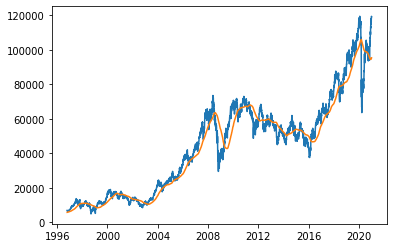

In [ ]:
plt.plot(df['Adj Close']) # LINHA AZUL
plt.plot(df['MA200']) # LINHA LARANJA
plt.show() # busca-se verificar se a linha azul está abaixo da linha laranja

# Calculando o IRF

In [ ]:
df['price_change'] = df['Adj Close'].pct_change()
df = df.dropna()
df

,Open,High,Low,Close,Adj Close,Volume,MA200,price_change
Date,,,,,,,,
1996-10-21,6851.500000,6851.500000,6761.700195,6798.899902,6798.899902,0,5682.7275,0.000118
1996-10-22,6798.899902,6798.899902,6659.899902,6675.600098,6675.600098,0,5692.6980,-0.018135
1996-10-23,6658.100098,6658.100098,6543.000000,6648.600098,6648.600098,0,5702.5205,-0.004045
1996-10-24,6645.000000,6645.000000,6562.600098,6588.799805,6588.799805,0,5711.9930,-0.008994
1996-10-25,6595.000000,6595.000000,6492.600098,6503.399902,6503.399902,0,5720.8050,-0.012961
...,...,...,...,...,...,...,...,...
2020-12-22,115825.000000,116903.000000,115648.000000,116348.000000,116348.000000,6947900,94821.4450,0.002862
2020-12-23,116636.000000,118311.000000,116636.000000,117857.000000,117857.000000,6483300,94920.7450,0.012970
2020-12-28,117806.000000,119213.000000,117805.000000,119051.000000,119051.000000,7171700,95085.6650,0.010131


In [ ]:
df['Upmove'] = df['price_change'].apply(lambda x: x if x > 0 else 0)

In [ ]:
df['Downmove'] = df['price_change'].apply(lambda x: abs(x) if x < 0 else 0)

In [ ]:
df['avg Up'] = df['Upmove'].ewm(span=19).mean() # ewm = media movel exponencial

In [ ]:
df['avg Down'] = df['Downmove'].ewm(span=19).mean()

In [ ]:
df = df.dropna()
df

,Open,High,Low,Close,Adj Close,Volume,MA200,price_change,Upmove,Downmove,avg Up,avg Down
Date,,,,,,,,,,,,
1996-10-21,6851.500000,6851.500000,6761.700195,6798.899902,6798.899902,0,5682.7275,0.000118,0.000118,0.000000,0.000118,0.000000
1996-10-22,6798.899902,6798.899902,6659.899902,6675.600098,6675.600098,0,5692.6980,-0.018135,0.000000,0.018135,0.000056,0.009545
1996-10-23,6658.100098,6658.100098,6543.000000,6648.600098,6648.600098,0,5702.5205,-0.004045,0.000000,0.004045,0.000035,0.007515
1996-10-24,6645.000000,6645.000000,6562.600098,6588.799805,6588.799805,0,5711.9930,-0.008994,0.000000,0.008994,0.000025,0.007945
1996-10-25,6595.000000,6595.000000,6492.600098,6503.399902,6503.399902,0,5720.8050,-0.012961,0.000000,0.012961,0.000019,0.009170
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-22,115825.000000,116903.000000,115648.000000,116348.000000,116348.000000,6947900,94821.4450,0.002862,0.002862,0.000000,0.005394,0.002831
2020-12-23,116636.000000,118311.000000,116636.000000,117857.000000,117857.000000,6483300,94920.7450,0.012970,0.012970,0.000000,0.006152,0.002548
2020-12-28,117806.000000,119213.000000,117805.000000,119051.000000,119051.000000,7171700,95085.6650,0.010131,0.010131,0.000000,0.006550,0.002293


In [ ]:
df['FR'] = df['avg Up']/df['avg Down']

In [ ]:
df['IFR'] = df['FR'].apply(lambda x: 100 - (100/(x+1)))

# 2) Entrar quando o IFR de 10 períodos < 30 (comprar no próximodia de abertura)

In [ ]:
df.loc[(df['Adj Close'] > df['MA200']) & (df['IFR'] < 30), 'Buy'] = 'Yes'

In [ ]:
df.loc[(df['Adj Close'] < df['MA200']) | (df['IFR'] > 30), 'Buy'] = 'No'

In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume,MA200,price_change,Upmove,Downmove,avg Up,avg Down,FR,IFR,Buy
Date,,,,,,,,,,,,,,,
1996-10-21,6851.500000,6851.500000,6761.700195,6798.899902,6798.899902,0,5682.7275,0.000118,0.000118,0.000000,0.000118,0.000000,inf,100.000000,No
1996-10-22,6798.899902,6798.899902,6659.899902,6675.600098,6675.600098,0,5692.6980,-0.018135,0.000000,0.018135,0.000056,0.009545,0.005839,0.580479,Yes
1996-10-23,6658.100098,6658.100098,6543.000000,6648.600098,6648.600098,0,5702.5205,-0.004045,0.000000,0.004045,0.000035,0.007515,0.004679,0.465738,Yes
1996-10-24,6645.000000,6645.000000,6562.600098,6588.799805,6588.799805,0,5711.9930,-0.008994,0.000000,0.008994,0.000025,0.007945,0.003139,0.312908,Yes
1996-10-25,6595.000000,6595.000000,6492.600098,6503.399902,6503.399902,0,5720.8050,-0.012961,0.000000,0.012961,0.000019,0.009170,0.002056,0.205130,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-22,115825.000000,116903.000000,115648.000000,116348.000000,116348.000000,6947900,94821.4450,0.002862,0.002862,0.000000,0.005394,0.002831,1.905632,65.584076,No
2020-12-23,116636.000000,118311.000000,116636.000000,117857.000000,117857.000000,6483300,94920.7450,0.012970,0.012970,0.000000,0.006152,0.002548,2.414724,70.715057,No
2020-12-28,117806.000000,119213.000000,117805.000000,119051.000000,119051.000000,7171700,95085.6650,0.010131,0.010131,0.000000,0.006550,0.002293,2.856572,74.070236,No


# 3) Sair quando IFR de 10 períodos > 40

In [ ]:
PnL = [] # Profits and Loses

for i in range(len(df) - 12):
    if "Yes" in df['Buy'].iloc[i]:
        for j in range(1,11):
            if df['IFR'].iloc[i + j] > 40:
                PnL.append(df['Open'].iloc[i+j+1] - df['Open'].iloc[i+1])
                break
            elif j == 10:
                PnL.append(df['Open'].iloc[i+j+1] - df['Open'].iloc[i+1])

In [ ]:
PnL

[-16.89990234375,
 -3.7998046875,
 46.2001953125,
 96.5,
 240.10009765625,
 444.0,
 288.0,
 320.0,
 646.0,
 -727.0,
 -911.0,
 -569.0,
 -517.0,
 -260.0,
 -29.0,
 -90.0,
 57.0,
 -16.0,
 141.0,
 233.0,
 345.0,
 454.0,
 -100.0,
 640.0,
 584.0,
 393.0,
 -2155.0,
 -1450.0,
 -1013.0,
 -1584.0,
 910.0,
 -246.0,
 -158.0,
 1076.0,
 1470.0,
 1780.0,
 2032.0,
 1677.0,
 2464.0,
 3719.0,
 3184.0,
 418.0,
 1631.0,
 1062.0,
 1518.0,
 1961.0,
 1557.0,
 1462.0,
 1314.0,
 590.0,
 534.0,
 117.0,
 1298.0,
 1739.0,
 -5641.0,
 -4976.0,
 3009.0,
 4265.0,
 1420.0,
 1895.0,
 -291.0,
 1923.0,
 1940.0]

In [ ]:
len([i for i in PnL if i >0]) # numero de sucessos

43

In [ ]:
len(PnL)

63

In [ ]:
len([i for i in PnL if i >0])/len(PnL) # Taxa de Acerto

0.6825396825396826